<a href="https://colab.research.google.com/github/fengfrankgthb/BUS-41204/blob/main/QQQ_Model_Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Disclaimer**:

This is the initial lesson from #Dataquest on YouTube.
Thanks to the author/instructor /github/dataquestio/

**Project Overview**

In this project, we'll predict the price of the QQQ stock market index.

**Project Steps**

* Download data using the yfinance package
* Create an initial machine learning model and estimate accuracy
* Build a backtesting engine to more accurately measure accuracy
* Improve the accuracy of the model

**Local Setup**

**Installation**

To follow this project, please install the following locally:

* JupyerLab
* Python 3.8+
* Python packages
  * pandas
  * yfinance
  * scikit-learn

**Data**

We'll download all of the data during the project, using the *yfinance* package.

# 1. Import Yahoo Finance Historical Data

To download financial data, one of the easiest way is `yfinance` package API.

    import yfinance as yf
    Stock_Name = yf.Ticker("Stock_Ticker")

**Data Limits**

It's crucial to understand that `yfinance` is an unofficial API wrapper, or a data scrapper. It works by scraping data from Yahoo Finance's website. Yahoo can change its website structure or implement stricter rate-limiting measures at any time without prior notice, potentially breaking `yfinance` functionality or leading to temporary blocks.

Based on user experiences and some older information related to Yahoo's APIs (which might still offer some insight):

**General Observations** and **Potential Limits**:

* "Too Many Requests" Errors: Users frequently encounter "Too Many Requests" or HTTP 429 errors, indicating they've hit some form of rate limiting.
* Varying Limits: The exact limits seem to be dynamic and not clearly defined. They might depend on factors like the frequency of requests, the volume of data being requested, and possibly even your IP address.
* Intraday Data: Requesting high-frequency intraday data (e.g., 1-minute intervals) for a large number of tickers or extended periods seems more likely to trigger rate limits.
* Batching Requests: Sending multiple ticker symbols in a single request (where the yfinance function allows) is generally more efficient and less likely to hit limits compared to making individual requests for each ticker.
* User-Agent Headers: Modifying the User-Agent header in  requests can sometimes help avoid being identified and blocked as an automated script. However, this is not a guaranteed solution and might stop working at any time.
* No Official Documentation: Because yfinance is unofficial, there's no dedicated documentation from Yahoo outlining specific rate limits.

**Inferred Potential Limits** (Based on older Yahoo API information and user reports):

* Per Minute: limits in the range of 60 to a few hundred requests per minute. However, these are likely outdated and might not directly apply to how Yahoo currently handles scraping or unofficial API usage.
* Per Hour: limits in the range of 360 to several thousand requests per hour. Again, treat these with caution.
* Per Day: limits were sometimes speculated to be in the range of a few thousand to tens of thousands of requests.
(Personal, less than 10 request on Max QQQ (6500 days)

**Important Considerations for Using yfinance**:

* Be Respectful: Avoid making excessively frequent requests, especially in tight loops. Implement delays (e.g., using **time.sleep()**) between requests.
* Error Handling: Implement robust error handling in your code to catch YFinance errors (including rate limit errors) and handle them gracefully (e.g., by pausing and retrying later with an exponential backoff strategy).
* Caching: Cache the data you retrieve locally whenever possible to reduce the number of API calls needed.
* Consider Alternatives: If you require reliable, high-volume, and officially supported financial data, consider exploring paid APIs from financial data providers.
* Monitor for Changes: Be aware that yfinance's functionality and Yahoo's rate-limiting behavior can change without notice. Regularly check for updates to the yfinance library and be prepared to adapt your code.

**In summary, there is no exact, officially stated data limit for the yfinance API in terms of requests per day or per hour. Users often experience rate limiting, but the specific thresholds are not public and can change. It's best to be conservative with your request frequency and implement strategies to mitigate the risk of being blocked.**

Sample Code to cache the `yfinance` data in csv format in current directory:

    import yfinance as yf
    QQQ = yf.Ticker("QQQ")
    hist_data = QQQ.history(period="max")

    # Save the DataFrame to a CSV file to current directory
    hist_data.to_csv("QQQ_historical_data.csv")

Sample Code to cache the `yfinance` data in Pickle format in current directory:

    import yfinance as yf
    QQQ = yf.Ticker("QQQ")
    hist_data = QQQ.history(period="max")

    # Save the DataFrame to a Pickle file to current directory
    hist_data.to_pickle("QQQ_historical_data.pkl")

Sample Code to cache the `yfinance` data in csv format in my own G-Drive:

    # Mount my G-Drive in Colab:
    from google.colab import drive
    drive.mount('/content/drive')

    # The follow prompts to authorize Colab to access your Google Drive
    import shutil
    colab_file_path = "QQQ.csv"  # Assuming QQQ.csv is in root of Colab environment
    drive_folder_path = "/content/drive/MyDrive/My Data"  # Adjust this to your desired Google Drive path

    # Create the directory in Google Drive if it doesn't exist
    import os
    os.makedirs(drive_folder_path, exist_ok=True) # Adjust "drive_folder_path" to your desired folder path

    drive_file_path = f"{drive_folder_path}/QQQ.csv"
    shutil.copy(colab_file_path, drive_file_path)
    print(f"File 'QQQ.csv' copied to '{drive_file_path}' in your Google Drive.")


    

In [ ]:
import yfinance as yf
QQQ = yf.Ticker("QQQ")
QQQ = QQQ.history(period="max")
QQQ


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1999-03-10 00:00:00-05:00,43.335822,43.362311,42.620622,43.282845,5232000,0.0,0.0,0.0
1999-03-11 00:00:00-05:00,43.600699,43.852343,42.647099,43.494743,9688600,0.0,0.0,0.0
1999-03-12 00:00:00-05:00,43.335810,43.362299,42.090833,42.435188,8743600,0.0,0.0,0.0
1999-03-15 00:00:00-05:00,42.753068,43.706668,42.302757,43.653690,6369000,0.0,0.0,0.0
1999-03-16 00:00:00-05:00,43.839110,44.209955,43.362310,44.024532,4905800,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-04-28 00:00:00-04:00,473.029999,474.809998,466.029999,472.410004,33550800,0.0,0.0,0.0
2025-04-29 00:00:00-04:00,470.170013,476.420013,469.589996,475.529999,30613100,0.0,0.0,0.0
2025-04-30 00:00:00-04:00,467.130005,477.200012,462.429993,475.470001,46810600,0.0,0.0,0.0


<Axes: xlabel='Date'>

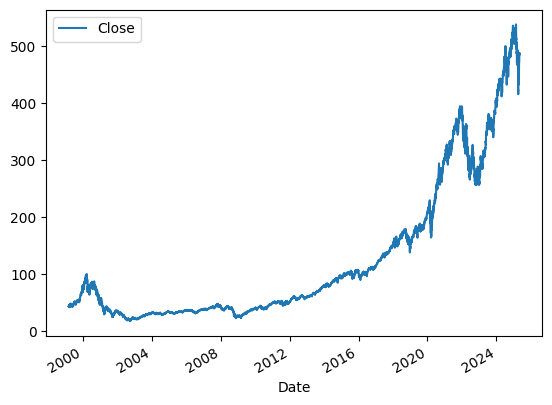

In [3]:
QQQ.plot.line(y="Close", use_index=True)

In [4]:
QQQ

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1999-03-10 00:00:00-05:00,43.335807,43.362296,42.620607,43.282829,5232000,0.0,0.0,0.0
1999-03-11 00:00:00-05:00,43.600687,43.852332,42.647088,43.494732,9688600,0.0,0.0,0.0
1999-03-12 00:00:00-05:00,43.335818,43.362307,42.090840,42.435196,8743600,0.0,0.0,0.0
1999-03-15 00:00:00-05:00,42.753072,43.706672,42.302761,43.653694,6369000,0.0,0.0,0.0
1999-03-16 00:00:00-05:00,43.839095,44.209939,43.362295,44.024517,4905800,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-04-29 00:00:00-04:00,470.170013,476.420013,469.589996,475.529999,30613100,0.0,0.0,0.0
2025-04-30 00:00:00-04:00,467.130005,477.200012,462.429993,475.470001,46810600,0.0,0.0,0.0
2025-05-01 00:00:00-04:00,483.410004,487.179993,480.739990,481.679993,43316500,0.0,0.0,0.0


In [5]:
QQQ.index

DatetimeIndex(['1999-03-10 00:00:00-05:00', '1999-03-11 00:00:00-05:00',
               '1999-03-12 00:00:00-05:00', '1999-03-15 00:00:00-05:00',
               '1999-03-16 00:00:00-05:00', '1999-03-17 00:00:00-05:00',
               '1999-03-18 00:00:00-05:00', '1999-03-19 00:00:00-05:00',
               '1999-03-22 00:00:00-05:00', '1999-03-23 00:00:00-05:00',
               ...
               '2025-04-22 00:00:00-04:00', '2025-04-23 00:00:00-04:00',
               '2025-04-24 00:00:00-04:00', '2025-04-25 00:00:00-04:00',
               '2025-04-28 00:00:00-04:00', '2025-04-29 00:00:00-04:00',
               '2025-04-30 00:00:00-04:00', '2025-05-01 00:00:00-04:00',
               '2025-05-02 00:00:00-04:00', '2025-05-05 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=6580, freq=None)

In [6]:
# Get the column titles
column_titles = QQQ.columns

# Print the column titles
print(column_titles)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Capital Gains'],
      dtype='object')


In [7]:
del QQQ["Dividends"]
del QQQ["Stock Splits"]
del QQQ["Capital Gains"]

In [8]:
# Get the column titles
column_titles = QQQ.columns

# Print the column titles
print(column_titles)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


## Creating New "Tomorrow" and "Target" Columns For Training

In [11]:
QQQ["Tomorrow"] = QQQ["Close"].shift(-1) # Define new column "Tomorrow" = "Close" shift(-1)
QQQ

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1999-03-10 00:00:00-05:00,43.335807,43.362296,42.620607,43.282829,5232000,43.494732
1999-03-11 00:00:00-05:00,43.600687,43.852332,42.647088,43.494732,9688600,42.435196
1999-03-12 00:00:00-05:00,43.335818,43.362307,42.090840,42.435196,8743600,43.653694
1999-03-15 00:00:00-05:00,42.753072,43.706672,42.302761,43.653694,6369000,44.024517
1999-03-16 00:00:00-05:00,43.839095,44.209939,43.362295,44.024517,4905800,43.706669
...,...,...,...,...,...,...
2025-04-29 00:00:00-04:00,470.170013,476.420013,469.589996,475.529999,30613100,475.470001
2025-04-30 00:00:00-04:00,467.130005,477.200012,462.429993,475.470001,46810600,481.679993
2025-05-01 00:00:00-04:00,483.410004,487.179993,480.739990,481.679993,43316500,488.829987


In [12]:
QQQ["Target"] = (QQQ["Tomorrow"] > QQQ["Close"]).astype(int) # Define new Column "Target" = ("Tomorrow" > "Close")
QQQ

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1999-03-10 00:00:00-05:00,43.335807,43.362296,42.620607,43.282829,5232000,43.494732,1
1999-03-11 00:00:00-05:00,43.600687,43.852332,42.647088,43.494732,9688600,42.435196,0
1999-03-12 00:00:00-05:00,43.335818,43.362307,42.090840,42.435196,8743600,43.653694,1
1999-03-15 00:00:00-05:00,42.753072,43.706672,42.302761,43.653694,6369000,44.024517,1
1999-03-16 00:00:00-05:00,43.839095,44.209939,43.362295,44.024517,4905800,43.706669,0
...,...,...,...,...,...,...,...
2025-04-29 00:00:00-04:00,470.170013,476.420013,469.589996,475.529999,30613100,475.470001,0
2025-04-30 00:00:00-04:00,467.130005,477.200012,462.429993,475.470001,46810600,481.679993,1
2025-05-01 00:00:00-04:00,483.410004,487.179993,480.739990,481.679993,43316500,488.829987,1


# Traning Basic Model: Random Forest Classifier




In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1) # This rf has 100 decision trees, and requires 100 sample to split a new node

train = QQQ.iloc[:-200] # Ensure no cross validation in time series, excluding 200 rows in training.
test = QQQ.iloc[-200:] # Last 200 data rows dedicated to testing

predictors = ["Close", "Volume", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [16]:
import pandas as pd

preds = pd.Series(preds, index=test.index) # Updates the preds array into a series with test index (the date).

preds

,0
Date,
2024-07-18 00:00:00-04:00,1
2024-07-19 00:00:00-04:00,1
2024-07-22 00:00:00-04:00,1
2024-07-23 00:00:00-04:00,1
2024-07-24 00:00:00-04:00,1
...,...
2025-04-29 00:00:00-04:00,1
2025-04-30 00:00:00-04:00,1
2025-05-01 00:00:00-04:00,1


In [18]:
precision_score(test["Target"], preds) # Compare "Target" and preds for TP / (TP + FP)

0.544973544973545

In [36]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

accuracy = accuracy_score(test["Target"], preds) # (TP + TN) / ALL
print(f"Accuracty: {accuracy}")

recall = recall_score(test["Target"], preds) # TP / (TP + FN)
print(f"Recall: {recall}")

f1 = f1_score(test["Target"], preds) # 2TP / (2TP + TN + FP) = 2*P*R / (P + R)
print(f"F1 Score: {f1}")

specificity = recall_score(test["Target"], preds, pos_label=0) # TN / (TN + FP)
print(f"Specificity: {specificity}")



Accuracty: 0.53
Recall: 0.9279279279279279
F1 Score: 0.6866666666666666
Specificity: 0.033707865168539325


**Understand the result above**:

**Precision**: 54%. Buying on the preds "1" makes profits 54 times vs loss 46 times, with 8% chance margin.

**Recall**: 92%. Buying on the preds "1" misses only 8% of the buying opportunities.

**Accuracy**: 53%. Buying on the preds "1" and Selling on the preds "0" together makes profits 53 times vs loss 47 times, with 6% chance margin.

**F1**: 68%. Good balance between precision and recall sensitivity.

**nPrecision**: 27%. Selling on the preds "0" makes profits 27 times vs loss 73 times, with -46% chance margin. Don't sell on prediction!


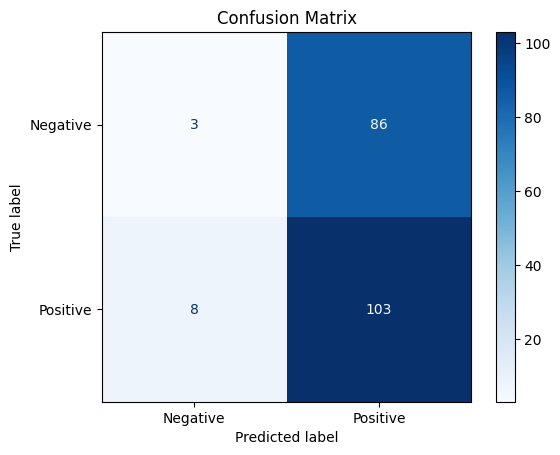

In [42]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(test["Target"], preds)

# Define class labels (optional)
class_labels = ['Negative', 'Positive']

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

<Axes: xlabel='Date'>

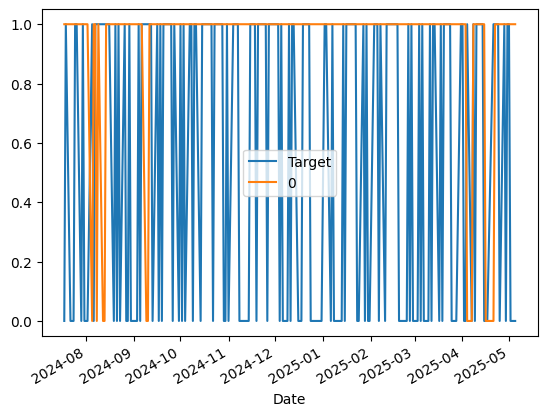

In [43]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

# Backtest 10-Year Base

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range (start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(QQQ, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

,count
Predictions,
0,2194
1,1885


In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5549071618037136

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

,count
Target,
1,0.559451
0,0.440549


# More Predictors: Close Ratios and Trends in 2D, 5D, 60D, 250D, 1000D

In [ ]:
horizons = [2,5,60,250,1000]
new_predictors =[]

for horizon in horizons:
    rolling_averages = QQQ.rolling(horizon).mean() # calculate the rolling averages in the horizons

    #Create columns of ratios and trends
    ratio_column = f"Close_Ratio_{horizon}" # Name the variable "ration_column_2/5/60/250/1000"
    QQQ[ratio_column] = QQQ["Close"] / rolling_averages["Close"] # Define/calculate a column of ratio_column in QQQ dataframe

    trend_column = f"Trend_{horizon}" # Name the variable "trend_2/5/60/250/1000"
    QQQ[trend_column] = QQQ.shift(1).rolling(horizon).sum()["Target"] # Define/calculate a column of tend in QQQ dataframe

    new_predictors += [ratio_column, trend_column] # Name ratios and trends as new_predictors

In [ ]:
QQQ

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1999-03-10 00:00:00-05:00,43.335822,43.362311,42.620622,43.282845,5232000,43.494743,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-11 00:00:00-05:00,43.600699,43.852343,42.647099,43.494743,9688600,42.435188,0,1.002442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-12 00:00:00-05:00,43.335810,43.362299,42.090833,42.435188,8743600,43.653690,1,0.987670,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-15 00:00:00-05:00,42.753068,43.706668,42.302757,43.653690,6369000,44.024532,1,1.014154,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-16 00:00:00-05:00,43.839110,44.209955,43.362310,44.024532,4905800,43.706669,0,1.004230,2.0,1.014900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-28 00:00:00-04:00,473.029999,474.809998,466.029999,472.410004,33550800,475.529999,1,0.999841,1.0,1.021931,4.0,0.971282,31.0,0.975988,145.0,1.250386,543.0
2025-04-29 00:00:00-04:00,470.170013,476.420013,469.589996,475.529999,30613100,475.470001,0,1.003291,1.0,1.015044,4.0,0.979240,32.0,0.982065,145.0,1.258129,544.0
2025-04-30 00:00:00-04:00,467.130005,477.200012,462.429993,475.470001,46810600,481.679993,1,0.999937,1.0,1.005937,3.0,0.980525,32.0,0.981508,145.0,1.257464,543.0


------Runtime stopped here 2025.05.04 at 22:48------

In [ ]:
QQQ = QQQ.dropna() # drop the rows with "NaN" values because it can contaminate the model training
QQQ

In [ ]:
# Revise parameters rfm:
# increase n_estimators from 100 to 200
# decrease min_samples_split from 100 to 50
# random_state kept at 1
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

# Revised the training code, and set a higher probability threshhold (60%) to Buy/1.
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors]) [:1] # Calculate the probabilities of "Tomorrow" as 1/Up or 0/Dn
    preds[preds>=.6] = 1 # set threshhold of up-predictions at probability of 60%, making "Target"=1 more precise.
    preds[preds<.6] = 0 # Or else, predict "Target"=0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
predictions = backtest(QQQ, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

# Summary in This Model:

* 1) Downloaded some stock data from *yfinance*, cleaned and visualized the data;
* 2) Set up machine learning target, trained our initial model
* 3) Evaluated error, created a way to backtest accurately
measuring that error over long periods of time ;
* 4) Improved model with extra predictor columns.

# Next Steps to Improve This Model

* 1) **Foreign Exchanges**: There are other indices
around the world that open before the u.s markets open so it might be worth looking at those prices and seeing if they actually correlate. If an index on the other side of the
world is increasing does that help predict the US market bet;
* 2) **News Headlines**: News, includeing articles that are general macroeconomic conditions like interest rates, inflation, etc., can also add in some key predictor components of the market like key stocks and key sectors.For example, if tech is in a downturn, it's possible that six months later the S&P 500 will go down.
* 3) **Intra-Day Horizons**: Try looking at hourly, minute data even if it's not always the easiest or cheapest to get. But if you
can get that data, you can make more accurate predictions.